            
                                Dynamic Models for Building Energy Management
                                
                                
                                
Notre étude portera sur un studio de 25m2, une buanderie de 25m2et un couloir.
Cette construction comporte une fenêtre et deux portes. Les dimensions sont détaillées sur la figure ci-dessous. La fenêtre est munie d’un double vitrage. Une seule face de la construction est en contact avec l’extérieur ( la fenêtre y appartient ).
Hypothèses : 
Les parois du bâtiment (marqués en traits noirs) sont considérées comme adiabatiques 
Le transfert de chaleur avec le sol et le plafond est négligeable.
La température est uniforme sur chaque surface d’un mur.
Conditions aux limites : 
La température à l'extérieur du bâtiment est de 10°C.
La température au niveau du couloir du bâtiment est de 20°C. 

Composition ds murs, de la fenêtre et des portes :
Le mur extérieur (en contact avec l’extérieur) est composé de : 20 cm de béton, 8 cm d’isolant (laine de verre) et 2 cm de placoplatre.
Le mur intérieur (en contact avec le couloir) est composé de 2x2cm de placoplatre séparés de 8 cm de laine de verre. 
La hauteur de tous les murs est de 320 cm. 
Le mur qui sépare les 2 pièces est composé de 15 cm de placoplatre. 
La fenêtre est en double vitrage (4mm de verre, 16 mm d’air, 4mm de verre) une hauteur de 100 cm et une largeur de 90cm
Les portes sont en bois avec une épaisseur de 4 cm, une hauteur de 210 cm et une largeur de 90 cm. 



Nombre de noeuds de température : 2 
Nombre de branches à débit : 7
    

Vous trouverez ci-joint, le schéma représentant notre modèle ainsi que le schéma réseau  pour la modélisation du transfert de chaleur

![Texte alternatif](/Utilisateurs/rimbennis/Documents/Image-1.jpg)

![Texte alternatif](/Utilisateurs/rimbennis/Documents/Image-2.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import dm4bem
lm = 5 #m width of the wall
lp= 0.9  #m width of the door
lf=0.9  #m width of the window
ef=0.024 #m thickeness of the window
hm=3.2  #m height of the wall
hp=2.1  #m height of the door
ep=0.04 #m thickeness of the door
hf=1  #m width of the window
S1=lm*hm-lp*hp  # m² surface de la paroi 1 qui est en contact avec le in
S2=S1  # m² surface de la paroi 2 qui est en contact avec le in
S3=lm*hm-lf*hf  # m² surface de la paroi 3 qui est en contact avec le out
S4=lm*hm # m² surface de la paroi entre les deux pièces
Sp1=lp*hp # m² surface de la porte de la paroi 1
Sp2=Sp1 # m² surface de la porte de la paroi 2
Sf=lf*hf # m² surface de la fenêtre de la paroi 3

In [2]:
concrete = {'Conductivity': 1.400,
            'Density': 2300.0,
            'Specific heat': 880,
            'Width': 0.2,
           'Surface': S3}
insulation_in = {'Conductivity': 0.04,
              'Density': 16,
              'Specific heat': 1210,
              'Width': 0.08,
              'Surface':S1+S2}
insulation_out = {'Conductivity': 0.04,
              'Density': 16,
              'Specific heat': 1210,
              'Width': 0.08,
              'Surface':S3}
placoboard_in = {'Conductivity': 0.3,
            'Density': 800.0,
            'Specific heat': 1200,
            'Width': 0.02,
            'Surface': S1+S2}
placoboard_out = {'Conductivity': 0.3,
            'Density': 800.0,
            'Specific heat': 1200,
            'Width': 0.02,
            'Surface': S3}
placoboard_mid = {'Conductivity': 0.3,
            'Density': 800.0,
            'Specific heat': 1200,
            'Width': 0.15,
            'Surface': S4}
wood = {'Conductivity': 0.14,
        'Density': 500,
        'Specific heat': 2500,
        'Width': 0.04,
        'Surface': Sp1 }
air = {'Conductivity': 0.024,
        'Density': 1.2,                      # kg/m³
       'Specific heat': 1000 ,             # J/(kg·K)
       'Width': 0.016,
       'Surface': Sf}
glass = {'Conductivity': 1.4,
         'Density': 2500,
         'Specific heat': 1210,
         'Width': 0.004,
         'Surface': Sf}

wall_in=  pd.DataFrame.from_dict({'Layer_in': placoboard_in,
                                  'middle': insulation_in,
                                  'Layer_out': placoboard_in},
                              orient='index')
wall_out=  pd.DataFrame.from_dict({'Layer_in': placoboard_out,
                                   'middle': insulation_out,
                                   'Layer_out': concrete},
                              orient='index')
wall_mid= pd.DataFrame.from_dict({'Layer_in': placoboard_mid,
                                   'middle': placoboard_mid,
                                   'Layer_out': placoboard_mid},
                              orient='index')
door= pd.DataFrame.from_dict({'Layer_in': wood,
                            'middle': wood,
                            'Layer_out': wood},
                              orient='index')

window=pd.DataFrame.from_dict({'Layer_in': glass,
                               'middle': air,
                              'Layer_out': glass},
                              orient='index')


On calcule les conductances thermiques pour la conduction en utilisant la formule ci dessous : 

$$G_{cd}=\frac{\lambda}{\omega}S $$

In [3]:
# conductances thermiques 

G_cd_in = wall_in['Conductivity'] / wall_in['Width'] * wall_in['Surface']
pd.DataFrame(G_cd_in, columns={'Conductance'})
G_cd_out = wall_out['Conductivity'] / wall_out['Width'] * wall_out['Surface']
pd.DataFrame(G_cd_out, columns={'Conductance'})
G_cd_mid = wall_mid['Conductivity'] / wall_mid['Width'] * wall_mid['Surface']
pd.DataFrame(G_cd_mid, columns={'Conductance'})
G_cd_door = door['Conductivity'] / door['Width'] * door['Surface']
pd.DataFrame(G_cd_door, columns={'Conductance'})
G_cd_window = window['Conductivity'] / window['Width'] * window['Surface']
pd.DataFrame(G_cd_window, columns={'Conductance'})

G_cd_door

Layer_in     6.615
middle       6.615
Layer_out    6.615
dtype: float64


On calcule les conductances thermiques pour la conduction en utilisant la formule ci dessous : 
$$ G_{cv}=hS $$


In [4]:
#coefficient de convection
h= pd.DataFrame([{'in': 8., 'out': 25}], index=['h'])  # W/(m²⋅K)

# convection 
G_cv_in_in = 8 * wall_in['Surface'][0]     # wall_in côté intérieur
G_cv_in_out= 25 * wall_in['Surface'][2]     # wall_in côté extérieur


G_cv_out_in = 8 * wall_out['Surface'][0]     # wall_out côté intérieur
G_cv_out_out = 25 * wall_out['Surface'][2]     # wall_out côté extérieur


G_cv_mid_in = 8 * wall_mid['Surface'][0]     # wall_mid côté intérieur
G_cv_mid_out = 25 * wall_mid['Surface'][2]     # wall_mid côté extérieur


G_cv_door_in = 8 * door['Surface'][0] # door côté intérieur
G_cv_door_out = 25 * door['Surface'][2] # door côté extérieur


G_cv_window_in = 8 * window['Surface'][0]     # window côté intérieur
G_cv_window_out = 25 * window['Surface'][2]     # window côté extérieur


G_cv_in_in

225.76

On néglige la conductance du rayonnement à longues ondes puisque celui-ci est très faible dans notre système et est donc négligeable. 

On veut maintenant calculer la conductance d'advection qui s'écrit : 

$$ G_{v}= \rho_{a} *c_{a}*\overset{.}{V_{a}} $$

Pour cela, on fait l'hypothèse que nos portes et fenêtres sont complétement fermées et qu'il n'y a pas de bouche d'aération dans le mur qui sépare les deux pièces.  

In [5]:
# advection
# ventilation flow rate
Va = lf*ef*hf+ 2*lp*hp*ep                 # m³, volume of air
ACH = 0.5                    # air changes per hour for windows and doors closed
Va_dot = ACH / 3600 * Va    # m³/s, air infiltration

# ventilation & advection
Gv = air['Density'] * air['Specific heat'] * Va_dot
print(f'Gv = {Gv} W/K')


Gv = 0.0288 W/K


Nous allons maintenant calculer les capacités thermiques de chaque éléments de la pièce à l'aide de la formule suivante: 

$$ C = mc = \rho cwS $$

In [6]:
#thermal capacities 

C_wall_in = wall_in['Density'] * wall_in['Specific heat'] * wall_in['Width'] * S1*2
pd.DataFrame(C_wall_in, columns={'Capacities'})

C_wall_out = wall_out['Density'] * wall_out['Specific heat'] * wall_out['Width'] * S3
pd.DataFrame(C_wall_out, columns={'Capacities'})


C_door = door['Density'] * door['Specific heat'] * door['Width'] * Sp1
pd.DataFrame(C_door, columns={'Capacities'})

C_wall_mid = wall_mid['Density'] * wall_mid['Specific heat'] * wall_mid['Width'] * S4
pd.DataFrame(C_door, columns={'Capacities'})


C_window = window['Density'] * window['Specific heat'] * window['Width'] * Sf
pd.DataFrame(C_window, columns={'Capacities'})


C_wall_in['Layer_in']


541824.0

Nous cherchons maintenat à construire la matrice A,aussi appelée matrice d’incidence.
On remplit la matrice A de sorte à respecter les conditions suivantes : 




$$A_{kl}=\begin{cases}
&=0 &if &q_k &isn't &connected &to &\theta_l  \\
&=1 &if &q_k &enters &into &\theta_l  \\
&=-1 &if &q_k &gets &out &of &\theta_l  \\
\end{cases} $$

$$ A = \begin{pmatrix}
     	1&1&.......\\
     	-1&1&....... \\
     	-1&1&....... \\
... &...&.......
   \end{pmatrix} $$ 


In [7]:
#definition de A
A = np.zeros([29,24])

#noeud 0
A[0,0] = 1
for i in range(8) : 
    A[i+1,0]=-1
    i+=1

#noeud 1
for i in range(2) : 
    A[i,1]=1
    i+=1
for i in range(3,8) : 
    A[i,1]=-1
    i+=1

#noeud 2
for i in range(3) : 
    A[i,2]=1
    i+=1
for i in range(4,8) : 
    A[i,2]=-1
    i+=1

#noeud 3
for i in range(4) : 
    A[i,3]=1
    i+=1
for i in range(5,8) : 
    A[i,3]=-1
    i+=1

#noeud 4
for i in range(5) : 
    A[i,4]=1
    i+=1
for i in range(6,8) : 
    A[i,4]=-1
    i+=1

#noeud 5
for i in range(6) : 
    A[i,5]=1
    i+=1
for i in range(7,8) : 
    A[i,5]=-1
    i+=1

#noeud 6
for i in range(7) : 
    A[i,6]=1
    i+=1
for i in range(8,8) : 
    A[i,6]=-1
    i+=1

#noeud 7
for i in range(8) : 
    A[i,7]=1
    i+=1
A[8,7]=-1

#noeud 8
for i in range(10) : 
    A[i,8]=1
    i+=1
A[10,8]=-1
#noeud 9
A[11,9]=1
for i in range(12,19) : 
    A[i,9]=-1
    i+=1

#noeud 10
for i in range(11,13):
    A[i,10]=1
    i+=1
for i in range(13,19) : 
    A[i,10]=-1
    i+=1

#noeud 11
for i in range(11,14):
    A[i,11]=1
for i in range(14,19) : 
    A[i,11]=-1
    i+=1


#noeud 12
for i in range(11,15):
    A[i,12]=1
    i+=1
for i in range(15,19) : 
    A[i,12]=-1
    i+=1

#noeud 13
for i in range(11,16):
    A[i,13]=1
    i+=1
for i in range(16,19) : 
    A[i,13]=-1
    i+=1

#noeud 14
for i in range(11,17):
    A[i,14]=1
    i+=1
for i in range(17,19) : 
    A[i,14]=-1
    i+=1

#noeud 15
for i in range(11,18) : 
    A[i,15]=1
    i+=1
for i in range(18,19) : 
    A[i,15]=-1
    i+=1

#noeud 16
for i in range(10,29):
    A[i,16]=1
    i+=1

#noeud 17
for i in range(21,28) : 
    A[i,17]=1
    i+=1
A[28,17]=-1

#noeud 18
for i in range(21,27) : 
    A[i,18]=1
    i+=1
for i in range(27,29) : 
    A[i,18]=-1
    i+=1

#noeud 19
for i in range(21,26) : 
    A[i,19]=1
    i+=1
for i in range(26,29) : 
    A[i,19]=-1
    i+=1

#noeud 20
for i in range(21,25) : 
    A[i,20]=1
    i+=1
for i in range(25,29) : 
    A[i,20]=-1
    i+=1

#noeud 21
for i in range(21,24) : 
    A[i,21]=1
    i+=1
for i in range(24,29) : 
    A[i,21]=-1
    i+=1

#noeud 22
for i in range(21,23) : 
    A[i,22]=1
    i+=1
for i in range(23,29) : 
    A[i,22]=-1
    i+=1

#noeud 23
A[21,23]=1
for i in range(22,29) : 
    A[i,22]=-1
    i+=1

print(A)


[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1. -1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1. -1. -1.  0.  1.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1. -1. -1. -1.  0.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1. -1. -1. -1. -1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1. -1. -1. -1. -1. -1.  0.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.

Nous allons maintenant construire la matrice de conductance G 

In [8]:
# Matrice G : conductance matrix

import numpy as np
R1=(placoboard_in['Width']*0.5)/(placoboard_in['Conductivity']*placoboard_in['Surface'])
R2=R1
R3=(insulation_in['Width']*0.5)/(insulation_in['Conductivity']*insulation_in['Surface'])
R4= R3
R5=R1
R6=R5
R8= 0
R12=R1
R13=R1
R14=R3
R15=R3
R16=R1
R17=R1
R22=(concrete['Width']*0.5)/(concrete['Conductivity']*concrete['Surface'])
R23=R22
R24=R3
R25=R3
R26=R1
R27=R1

G= np.zeros((29,29))
G[0][0]= G_cv_in_out
G[1][1]=1/R1
G[2][2]=1/R2
G[3][3]=1/R3
G[4][4]=1/R4
G[5][5]=1/R5
G[6][6]=1/R6
G[7][7]= G_cv_in_in
G[8][8]=0
G[9][9]=2* G_cd_door['Layer_out']
G[10][10]=2*G_cd_mid['Layer_out']
G[11][11]=G_cv_in_out 
G[12][12]=1/R1
G[13][13]=1/R13
G[14][14]=1/R14
G[15][15]=1/R15
G[16][16]=1/R16
G[17][17]=1/R17
G[18][18]=G_cv_in_in
G[19][19]=2*G_cd_door['Layer_out']
G[20][20]=2*G_cd_window['Layer_out']
G[21][21]=G_cv_door_out
G[22][22]=1/R22
G[23][23]=1/R23
G[24][24]=1/R24
G[25][25]=1/R25
G[26][26]=1/R26
G[27][27]=1/R27
G[28][28]=G_cv_out_in

print(G)


[[705.5    0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.   846.6    0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.   846.6    0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.    28.22   0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.    28.22   0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
    0.     0.     0.     0.     0.  

On peut se permettre de négliger les capacités thermiques de l’air et des fenêtres. On poursuit donc l’étude avec cette étude en admettant des valeurs nulles. La matrice C est une matrice diagonale dont les coefficients correspondent aux capacités thermiques des parois intérieures et extérieures de chaque mur. 



In [9]:
import numpy as np
C= np.diag([0,C_wall_in['Layer_out'],0,C_wall_in['middle'],0,C_wall_in['Layer_in'],0,0,0,0,C_wall_in['Layer_out'],0,C_wall_in['middle'],0,C_wall_in['Layer_in'],0,0,0,C_wall_out['Layer_in'],0,C_wall_out['middle'],0,C_wall_out['Layer_out'],0])

print(C)

[[      0.          0.          0.          0.          0.          0.
        0.          0.          0.          0.          0.          0.
        0.          0.          0.          0.          0.          0.
        0.          0.          0.          0.          0.          0.   ]
 [      0.     541824.          0.          0.          0.          0.
        0.          0.          0.          0.          0.          0.
        0.          0.          0.          0.          0.          0.
        0.          0.          0.          0.          0.          0.   ]
 [      0.          0.          0.          0.          0.          0.
        0.          0.          0.          0.          0.          0.
        0.          0.          0.          0.          0.          0.
        0.          0.          0.          0.          0.          0.   ]
 [      0.          0.          0.      43707.136       0.          0.
        0.          0.          0.          0.          0.       

In [10]:
b= np.zeros(29)
T_in = 20
T_out= 10
b[[0,9,11,19]] = 1
b[[20,21]]= 1

f=np.zeros(24)

y = np.zeros(24)        # nodes
y[[16]] = 1              # nodes (temperatures) of interest
print(f'y = ', y)

print (y.shape)

y =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(24,)


On obtient la “state space representation” en résolvant le système de DAE.
State-space representation : 



$$C\dot{\Theta}=-(A^{T}GA)\Theta +A^{T}Gb+f
\dot{\Theta}_{S}=A_{S}\Theta_{S}+B_{S}u
y=C_{S}\Theta _{S}+D_{S}u$$

In [11]:
import dm4bem


[As, Bs, Cs, Ds] = dm4bem.tc2ss(A, G, b, C, f, y)
print('As = \n', As, '\n')
print('Bs = \n', Bs, '\n')
print('Cs = \n', Cs, '\n')
print('Ds = \n', Ds, '\n')


As = 
 [[-8.09423297e-04  3.48812250e-05 -1.60990269e-05  3.38768004e-20
   1.14699555e-20 -1.09368894e-20 -1.89925019e-20  1.05571175e-19
   1.70468422e-19]
 [ 4.32411880e-04 -1.08879094e-03  8.00516352e-04  9.20743014e-19
  -1.90340204e-19 -1.30142342e-18 -1.87771541e-19  1.18135641e-18
   1.90726947e-18]
 [-1.60990269e-05  6.45749857e-05 -5.38423011e-05  1.35347282e-19
  -4.39074775e-20 -2.23162237e-19 -1.05580556e-19  2.09682876e-19
   4.24535604e-19]
 [-3.35805705e-36 -8.09008021e-36  3.82703813e-35 -3.12500000e-03
   1.00714775e-17  7.34378566e-18  4.76112355e-20 -8.15257136e-20
  -8.59286385e-20]
 [-3.11776564e-35 -1.65744973e-35  1.76545531e-34  2.08088378e-16
  -1.29132231e-03  2.18492796e-16  1.02498011e-18 -2.24051951e-18
  -4.62083270e-18]
 [ 3.44128779e-36 -3.87967569e-36 -2.23211915e-37  6.92414076e-18
   1.17500571e-17 -3.12500000e-03 -2.61140450e-19  5.51132185e-19
   1.11465673e-18]
 [-1.10751601e-35 -1.44338458e-35 -3.29916476e-35  8.44209534e-20
   7.50766482e-20  6.

In [12]:
#Vecteur u
bT=np.ones(6)
bT[[0, 1, 2, 3,4,5]] =[20,20,20,20,10,10]

fQ=np.zeros(24)

u = np.hstack([bT])
print(f'u = {u}')



u = [20. 20. 20. 20. 10. 10.]


In [13]:
#température des pièces : 

yss = (-Cs @ np.linalg.inv(As) @ Bs + Ds) @ u
print(f'yss = {yss} °C')

θ = np.linalg.inv(A.T @ G @ A) @ (A.T @ G @ b + f)
print(f'θ = {θ} °C')
print(f'Max error between DAE and state-space: {max(abs(θ[6]-yss)):2.2e} °C')


#print(As.shape)
#print(Bs.shape)
#print(Cs.shape)
#print(Ds.shape)
#print(G.shape)

yss = [10.18077671] °C
θ = [ 5.00000000e-01 -2.97539771e-14  4.05009359e-13 -4.83169060e-13
  1.42108547e-13 -1.13686838e-13  1.13686838e-13 -2.88193780e-01
  7.88193780e-01  5.59250779e-01  1.47104551e-15 -2.66453526e-15
 -1.77635684e-15  3.02535774e-15  5.55111512e-17 -1.85158684e-01
  7.44409462e-01  6.93889390e-17 -8.67361738e-18 -6.10622664e-16
 -5.55111512e-16  1.23512311e-15  7.44409462e-01 -4.88818925e-01] °C
Max error between DAE and state-space: 1.02e+01 °C


In [14]:
#time step and settling time : 

λ = np.linalg.eig(As)[0]    # eigenvalues of matrix As

print('Time constants: \n', -1 / λ, 's \n')
print('2 x Time constants: \n', -2 / λ, 's \n')
dtmax = 2 * min(-1. / λ)
print(f'Maximum time step: {dtmax:.2f} s = {dtmax / 60:.2f} min')

# time step
dt = np.floor(dtmax / 60) * 60   # s
print(f'dt = {dt} s = {dt / 60:.0f} min')
# settling time
time_const = np.array([int(x) for x in sorted(-1 / λ)])
print('4 * Time constants: \n', 4 * time_const, 's \n')

t_settle = 4 * max(-1 / λ)                          # on pourra mettre juste t_settle = 500 secondes
print(f'Settling time: \
{t_settle:.0f} s = \
{t_settle / 60:.1f} min = \
{t_settle / (3600):.2f} h = \
{t_settle / (3600 * 24):.2f} days')


Time constants: 
 [   848.94422671   1301.84680659 167131.34229963  20831.58174608
    171.22608079    414.36711552    774.4           320.
    320.        ] s 

2 x Time constants: 
 [  1697.88845342   2603.69361318 334262.68459925  41663.16349215
    342.45216159    828.73423104   1548.8           640.
    640.        ] s 

Maximum time step: 342.45 s = 5.71 min
dt = 300.0 s = 5 min
4 * Time constants: 
 [   684   1280   1280   1656   3096   3392   5204  83324 668524] s 

Settling time: 668525 s = 11142.1 min = 185.70 h = 7.74 days


In [15]:
# Step response
# -------------
# Find the next multiple of 3600 s that is larger than t_settle
duration = np.ceil(t_settle / 3600) * 3600
n = int(np.floor(duration / dt))    # number of time steps
t = np.arange(0, n * dt, dt)        # time vector for n time steps

print(f'Duration = {duration} s')
print(f'Number of time steps = {n}')
# pd.DataFrame(t, columns=['time'])


Duration = 669600.0 s
Number of time steps = 2232


In [18]:
#Input vector U : 
u = np.zeros([6, n])                # u = [Tisp Tisp Tisp Tisp To To Φo Φi Qa Φa +2flux] total de 12
u[0:4, :] = 20 * np.ones([4, n])    # Tisp = 10 for n time steps
u[4:6, :] = 10 * np.ones([2, n])      # T0 = 20 for n time steps

# pd.DataFrame(u)


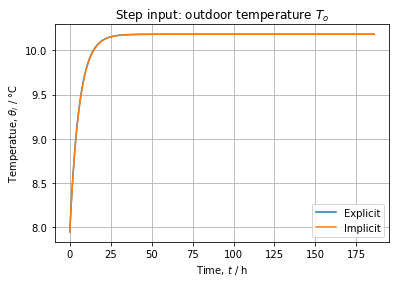

In [19]:
#Intégrer le temps 
n_s = As.shape[0]                      # number of state variables
θ_exp = np.zeros([n_s, t.shape[0]])    # explicit Euler in time t
θ_imp = np.zeros([n_s, t.shape[0]])    # implicit Euler in time t

I = np.eye(n_s)                        # identity matrix

for k in range(n - 1):
    θ_exp[:, k + 1] = (I + dt * As) @\
        θ_exp[:, k] + dt * Bs @ u[:, k]
    θ_imp[:, k + 1] = np.linalg.inv(I - dt * As) @\
        (θ_imp[:, k] + dt * Bs @ u[:, k])


y_exp = Cs @ θ_exp + Ds @  u
y_imp = Cs @ θ_imp + Ds @  u


fig, ax = plt.subplots()
ax.plot(t / 3600, y_exp.T, t / 3600, y_imp.T)
ax.set(xlabel='Time, $t$ / h',
       ylabel='Temperatue, $θ_i$ / °C',
       title='Step input: outdoor temperature $T_o$')
ax.legend(['Explicit', 'Implicit'])
ax.grid()
plt.show()
